### Prepare phenoype for subtype analysis : language task

- Build a scrubbing file to be used on subtype analysis for language task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [85]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [86]:
%matplotlib inline

In [87]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head()

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883


In [88]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("langRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess2_langRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("langLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess2_langLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456,HCP100206
20,HCP100307_sess2_langRL,0.0,316.0,0.101970,0.101970,HCP100307
34,HCP100408_sess2_langRL,0.0,316.0,0.128052,0.128052,HCP100408
48,HCP100610_sess2_langRL,0.0,316.0,0.189474,0.189474,HCP100610
62,HCP101006_sess2_langRL,0.0,316.0,0.156877,0.156877,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963,HCP100206
21,HCP100307_sess2_langLR,0.0,316.0,0.119331,0.119331,HCP100307
35,HCP100408_sess2_langLR,0.0,316.0,0.140232,0.140232,HCP100408
49,HCP100610_sess2_langLR,0.0,316.0,0.179002,0.179002,HCP100610
63,HCP101006_sess2_langLR,0.0,316.0,0.131924,0.131924,HCP101006


In [89]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
6,HCP100206_sess2_langRL,0.088456,0.088456,HCP100206
20,HCP100307_sess2_langRL,0.101970,0.101970,HCP100307
34,HCP100408_sess2_langRL,0.128052,0.128052,HCP100408
48,HCP100610_sess2_langRL,0.189474,0.189474,HCP100610
62,HCP101006_sess2_langRL,0.156877,0.156877,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
7,HCP100206_sess2_langLR,0.099963,0.099963,HCP100206
21,HCP100307_sess2_langLR,0.119331,0.119331,HCP100307
35,HCP100408_sess2_langLR,0.140232,0.140232,HCP100408
49,HCP100610_sess2_langLR,0.179002,0.179002,HCP100610
63,HCP101006_sess2_langLR,0.131924,0.131924,HCP101006


In [90]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [91]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess2_langRL,0.088456,0.088456,HCP100206,HCP100206_sess2_langLR,0.099963,0.099963
1,HCP100307_sess2_langRL,0.101970,0.101970,HCP100307,HCP100307_sess2_langLR,0.119331,0.119331
2,HCP100408_sess2_langRL,0.128052,0.128052,HCP100408,HCP100408_sess2_langLR,0.140232,0.140232
3,HCP100610_sess2_langRL,0.189474,0.189474,HCP100610,HCP100610_sess2_langLR,0.179002,0.179002
4,HCP101006_sess2_langRL,0.156877,0.156877,HCP101006,HCP101006_sess2_langLR,0.131924,0.131924


In [92]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [93]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.088456,0.088456,0.099963,0.099963
1,HCP100307,0.101970,0.101970,0.119331,0.119331
2,HCP100408,0.128052,0.128052,0.140232,0.140232
3,HCP100610,0.189474,0.189474,0.179002,0.179002
4,HCP101006,0.156877,0.156877,0.131924,0.131924


In [94]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_language.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [95]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.088456,0.088456,0.099963,0.099963,0.094210,0.094210
1,HCP100307,0.101970,0.101970,0.119331,0.119331,0.110650,0.110650
2,HCP100408,0.128052,0.128052,0.140232,0.140232,0.134142,0.134142
3,HCP100610,0.189474,0.189474,0.179002,0.179002,0.184238,0.184238
4,HCP101006,0.156877,0.156877,0.131924,0.131924,0.144401,0.144401


In [96]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,833.000000,833.000000,831.000000,831.000000,833.000000,833.000000
mean,0.144986,0.134209,0.145325,0.134864,0.134606,0.145212
std,0.052021,0.036417,0.049982,0.037680,0.036050,0.048137
min,0.057141,0.057141,0.062068,0.062068,0.060294,0.060294
25%,0.111627,0.108277,0.110393,0.106676,0.108889,0.111614
50%,0.133671,0.128714,0.135645,0.128850,0.128922,0.135504
75%,0.166221,0.154526,0.166712,0.156012,0.153972,0.167956
max,0.473389,0.287642,0.436617,0.310674,0.295814,0.381997


In [97]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

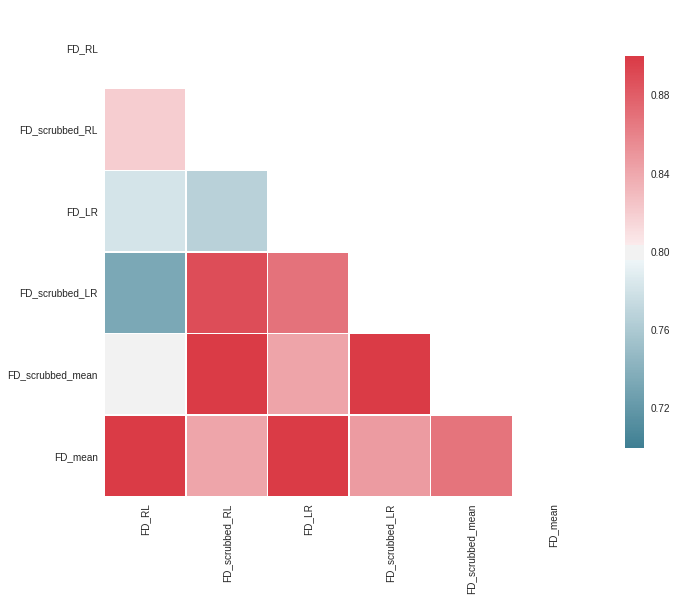

In [98]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

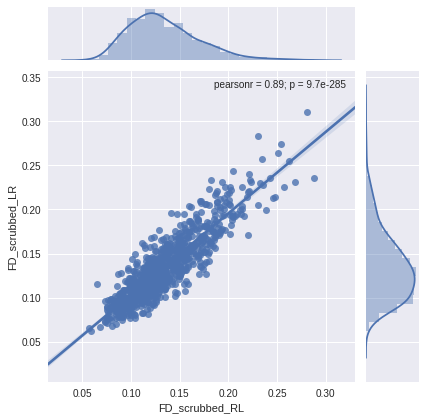

In [99]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

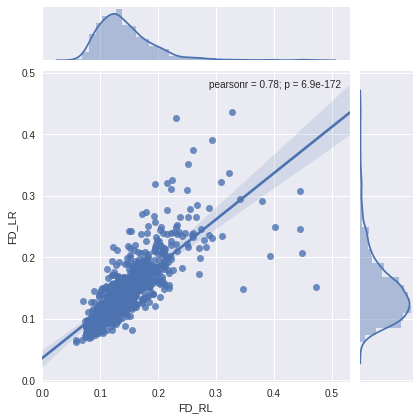

In [100]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [101]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm_python.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [102]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Twin_Stat','Zygosity','Mother_ID','BMI',"BPSystolic","BPDiastolic"]],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,BPSystolic,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,M,NotTwin,NotTwin,52259,25.49,135.0,77.0,1.182647,-0.288264,0.459645,0.082099,0.401938,-1.528823,0.002845,-0.082746,-0.712261
1,HCP100206,27,M,NotTwin,NotTwin,56037,26.64,119.0,71.0,1.280542,0.043885,0.700018,1.442533,1.984574,-0.507155,1.013050,0.020879,-0.199146
2,HCP100307,27,F,Twin,NotMZ,51488,22.96,117.0,70.0,0.518313,-0.959257,-0.558397,-0.716843,-0.703989,-0.136816,0.417536,-0.095940,-0.437668
3,HCP100408,33,M,Twin,MZ,51730,27.75,152.0,94.0,0.087549,-0.529605,-0.113013,-0.036545,-0.589858,0.225417,0.462647,-0.123929,0.098199
4,HCP100610,27,M,Twin,NotMZ,52813,36.91,141.0,75.0,-0.366816,-0.890299,-0.573586,-0.389725,0.205524,-0.195462,0.331794,0.683207,1.341814


In [103]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [104]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject        927
Age_in_Yrs     927
Gender         927
Twin_Stat      927
Zygosity       927
Mother_ID      927
BMI            927
BPSystolic     927
BPDiastolic    927
Cluster_1      927
Cluster_2      927
Cluster_3      927
Cluster_4      927
Cluster_5      927
Cluster_6      927
Cluster_7      927
Cluster_8      927
Cluster_9      927
dtype: int64

In [105]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [106]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,BPSystolic,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,1,NotTwin,NotTwin,52259,25.49,135.0,77.0,1.182647,-0.288264,0.459645,0.082099,0.401938,-1.528823,0.002845,-0.082746,-0.712261
1,HCP100206,27,1,NotTwin,NotTwin,56037,26.64,119.0,71.0,1.280542,0.043885,0.700018,1.442533,1.984574,-0.507155,1.013050,0.020879,-0.199146
2,HCP100307,27,2,Twin,NotMZ,51488,22.96,117.0,70.0,0.518313,-0.959257,-0.558397,-0.716843,-0.703989,-0.136816,0.417536,-0.095940,-0.437668
3,HCP100408,33,1,Twin,MZ,51730,27.75,152.0,94.0,0.087549,-0.529605,-0.113013,-0.036545,-0.589858,0.225417,0.462647,-0.123929,0.098199
4,HCP100610,27,1,Twin,NotMZ,52813,36.91,141.0,75.0,-0.366816,-0.890299,-0.573586,-0.389725,0.205524,-0.195462,0.331794,0.683207,1.341814


In [107]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [108]:
merged_pheno_scrub.count()

                    833
FD_RL               833
FD_scrubbed_RL      833
FD_LR               831
FD_scrubbed_LR      831
FD_scrubbed_mean    833
FD_mean             833
Subject             802
Age_in_Yrs          802
Gender              802
Twin_Stat           802
Zygosity            802
Mother_ID           802
BMI                 802
BPSystolic          802
BPDiastolic         802
Cluster_1           802
Cluster_2           802
Cluster_3           802
Cluster_4           802
Cluster_5           802
Cluster_6           802
Cluster_7           802
Cluster_8           802
Cluster_9           802
dtype: int64

In [109]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [110]:
merged_pheno_scrub_clean.count()

                    801
FD_RL               801
FD_scrubbed_RL      801
FD_LR               801
FD_scrubbed_LR      801
FD_scrubbed_mean    801
FD_mean             801
Subject             801
Age_in_Yrs          801
Gender              801
Twin_Stat           801
Zygosity            801
Mother_ID           801
BMI                 801
BPSystolic          801
BPDiastolic         801
Cluster_1           801
Cluster_2           801
Cluster_3           801
Cluster_4           801
Cluster_5           801
Cluster_6           801
Cluster_7           801
Cluster_8           801
Cluster_9           801
dtype: int64

In [111]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100206,0.088456,0.088456,0.099963,0.099963,0.094210,0.094210,HCP100206,27.0,1.0,...,71.0,1.280542,0.043885,0.700018,1.442533,1.984574,-0.507155,1.013050,0.020879,-0.199146
1,HCP100307,0.101970,0.101970,0.119331,0.119331,0.110650,0.110650,HCP100307,27.0,2.0,...,70.0,0.518313,-0.959257,-0.558397,-0.716843,-0.703989,-0.136816,0.417536,-0.095940,-0.437668
2,HCP100408,0.128052,0.128052,0.140232,0.140232,0.134142,0.134142,HCP100408,33.0,1.0,...,94.0,0.087549,-0.529605,-0.113013,-0.036545,-0.589858,0.225417,0.462647,-0.123929,0.098199
3,HCP100610,0.189474,0.189474,0.179002,0.179002,0.184238,0.184238,HCP100610,27.0,1.0,...,75.0,-0.366816,-0.890299,-0.573586,-0.389725,0.205524,-0.195462,0.331794,0.683207,1.341814
4,HCP101006,0.156877,0.156877,0.131924,0.131924,0.144401,0.144401,HCP101006,35.0,2.0,...,87.0,0.032712,0.050956,-0.383481,-0.887668,-0.754858,-0.305792,-1.048404,0.028991,-0.487552
5,HCP101107,0.224189,0.131822,0.325583,0.119171,0.125496,0.274886,HCP101107,22.0,1.0,...,62.0,0.197420,0.155567,1.325157,0.224913,-0.276800,0.356973,0.709327,-0.183826,-0.146470
6,HCP101309,0.074865,0.074865,0.089064,0.089064,0.081964,0.081964,HCP101309,29.0,1.0,...,72.0,-1.060926,-0.314457,-0.312864,-0.787882,-0.669426,0.403134,-0.423117,-0.141651,0.318475
7,HCP101410,0.126619,0.126619,0.133569,0.133569,0.130094,0.130094,HCP101410,29.0,1.0,...,91.0,-0.218950,-0.414397,-0.442689,0.036007,-0.376141,0.394380,-0.035287,-0.555772,-0.078283
8,HCP101915,0.093385,0.093385,0.097605,0.097605,0.095495,0.095495,HCP101915,35.0,2.0,...,70.0,-0.843474,-0.062772,-0.366811,-0.378947,-0.648643,1.181594,-0.689574,0.023781,1.137161
9,HCP102008,0.162509,0.162362,0.171901,0.169665,0.166013,0.167205,HCP102008,24.0,1.0,...,84.0,-0.106625,0.144928,0.488701,0.958724,0.059663,0.662034,1.154135,0.074862,-0.023097


In [112]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_language_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_language.csv"), index=False)